In [1]:
import os, numpy as np, cv2
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt, matplotlib.cm as cm

%matplotlib inline

#read the train dataset
train_X_images = [cv2.imread(os.path.join('train', fname), cv2.IMREAD_GRAYSCALE) 
                                                      for fname in os.listdir('train') ]
train_y_images = [cv2.imread(os.path.join('train_cleaned', fname), cv2.IMREAD_GRAYSCALE)
                                                       for fname in os.listdir('train_cleaned')]

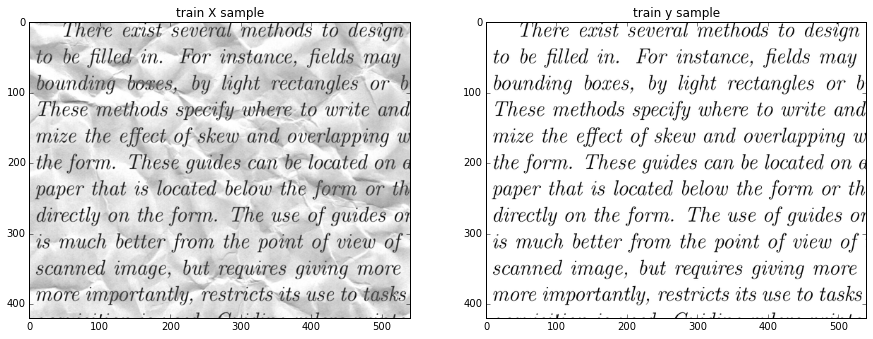

In [2]:
#read random image
img = cv2.imread('train//83.png', cv2.IMREAD_GRAYSCALE)
img_cleaned = cv2.imread('train_cleaned//83.png', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(15,30))
plt.subplot(121); plt.imshow(img, cmap =  cm.gray);
plt.title('train X sample');
plt.subplot(122); plt.imshow(img_cleaned, cmap = cm.gray)
plt.title('train y sample')
plt.show()

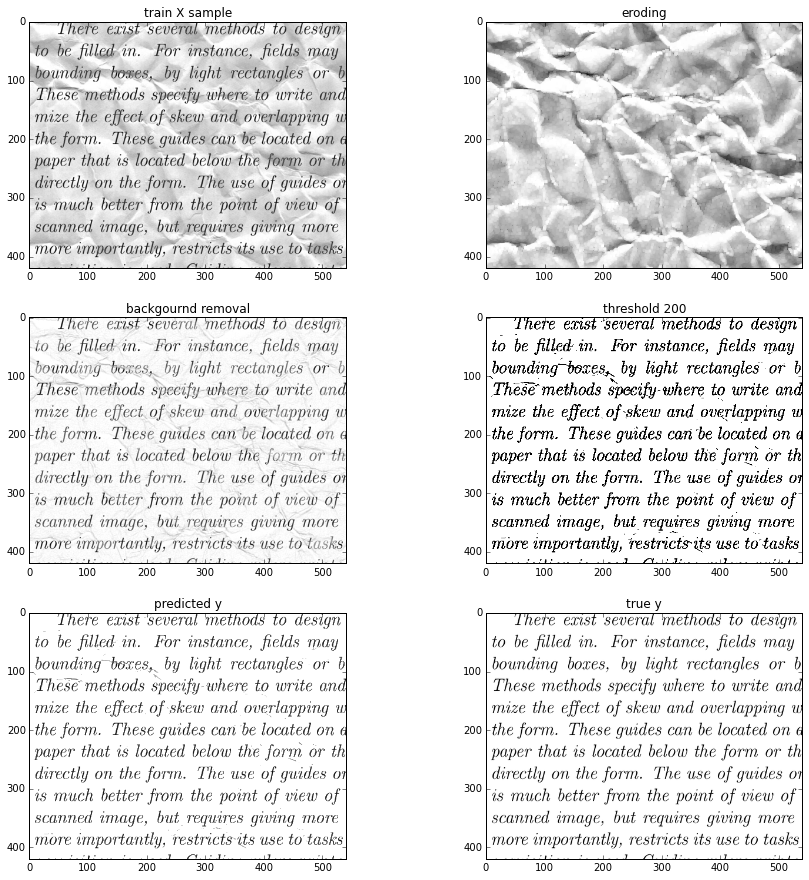

In [7]:
input_img = img
kernel = np.ones((4,4), np.uint8) 

img_erode  = 255 - cv2.erode(255 - input_img, kernel,iterations = 1)
img_sub = cv2.add(input_img, - img_erode)
#need to choose threshold automatically 
_, img_thresh = cv2.threshold(img_sub, 200, 255, cv2.THRESH_BINARY)
mask = img_thresh == 0                                     
img_final = np.where(mask, input_img, 255)

plt.figure(figsize=(15,15))
plt.subplot(321); plt.imshow(img, cmap = cm.gray); plt.title('train X sample')
plt.subplot(322); plt.imshow(img_erode, cmap = cm.gray); plt.title('eroding')
plt.subplot(323); plt.imshow(img_sub, cmap = cm.gray); plt.title('backgournd removal')
plt.subplot(324); plt.imshow(img_thresh, cmap = cm.gray); plt.title('threshold 200')
plt.subplot(325); plt.imshow(img_final, cmap = cm.gray); plt.title('predicted y')
plt.subplot(326); plt.imshow(img_cleaned, cmap = cm.gray); plt.title('true y')
plt.show()

In [9]:
def rmse(true_images, pred_images):
    result, n = 0, 0
    for true_img, pred_img in zip(true_images, pred_images):
        result += np.sum((true_img.ravel()/255.0 - pred_img.ravel()/255.0)**2)
        n += len(true_img.ravel())
    return (result / float(n))**0.5

rmse(train_y_images, train_X_images)

def clean_image(input_img):
    kernel = np.ones((4,4), np.uint8) 

    img_erode  = 255 - cv2.erode(255 - input_img, kernel,iterations = 1)
    img_sub = cv2.add(input_img, - img_erode)
    #need to choose threshold automatically 
    _, img_thresh = cv2.threshold(img_sub, 200, 255, cv2.THRESH_BINARY)
    mask = img_thresh == 0                                     
    img_final = np.where(mask, input_img, 255)
    return img_final

print "train data RMSE without cleaning: "
print rmse(train_y_images, train_X_images)


print "train data RMSE with cleaning: " 
print  rmse(train_y_images, map(clean_image, train_X_images))

train data RMSE without cleaning: 
0.15708200264
train data RMSE with cleaning: 
0.0490118928456


In [ ]:
#apply to test set
# test_X_images = [cv2.imread(os.path.join('test', fname), cv2.IMREAD_GRAYSCALE) 
#                                                       for fname in os.listdir('test') ]
# predicted_test_images = map(clean_image, test_X_images)
# for fname, img in zip(os.listdir('test'), predicted_test_images):
#     cv2.imwrite(os.path.join('test_cleaned', fname), img)